In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [6]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')

In [7]:
print(train['Datetime'])

0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
5       2012-08-25 05:00:00
6       2012-08-25 06:00:00
7       2012-08-25 07:00:00
8       2012-08-25 08:00:00
9       2012-08-25 09:00:00
10      2012-08-25 10:00:00
11      2012-08-25 11:00:00
12      2012-08-25 12:00:00
13      2012-08-25 13:00:00
14      2012-08-25 14:00:00
15      2012-08-25 15:00:00
16      2012-08-25 16:00:00
17      2012-08-25 17:00:00
18      2012-08-25 18:00:00
19      2012-08-25 19:00:00
20      2012-08-25 20:00:00
21      2012-08-25 21:00:00
22      2012-08-25 22:00:00
23      2012-08-25 23:00:00
24      2012-08-26 00:00:00
25      2012-08-26 01:00:00
26      2012-08-26 02:00:00
27      2012-08-26 03:00:00
28      2012-08-26 04:00:00
29      2012-08-26 05:00:00
                ...        
18258   2014-09-24 18:00:00
18259   2014-09-24 19:00:00
18260   2014-09-24 20:00:00
18261   2014-09-24 21:00:00
18262   2014-09-24 2

In [8]:
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
print(test['Datetime'])

0      2014-09-26 00:00:00
1      2014-09-26 01:00:00
2      2014-09-26 02:00:00
3      2014-09-26 03:00:00
4      2014-09-26 04:00:00
5      2014-09-26 05:00:00
6      2014-09-26 06:00:00
7      2014-09-26 07:00:00
8      2014-09-26 08:00:00
9      2014-09-26 09:00:00
10     2014-09-26 10:00:00
11     2014-09-26 11:00:00
12     2014-09-26 12:00:00
13     2014-09-26 13:00:00
14     2014-09-26 14:00:00
15     2014-09-26 15:00:00
16     2014-09-26 16:00:00
17     2014-09-26 17:00:00
18     2014-09-26 18:00:00
19     2014-09-26 19:00:00
20     2014-09-26 20:00:00
21     2014-09-26 21:00:00
22     2014-09-26 22:00:00
23     2014-09-26 23:00:00
24     2014-09-27 00:00:00
25     2014-09-27 01:00:00
26     2014-09-27 02:00:00
27     2014-09-27 03:00:00
28     2014-09-27 04:00:00
29     2014-09-27 05:00:00
               ...        
5082   2015-04-25 18:00:00
5083   2015-04-25 19:00:00
5084   2015-04-25 20:00:00
5085   2015-04-25 21:00:00
5086   2015-04-25 22:00:00
5087   2015-04-25 23:00:00
5

In [9]:
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format= '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')

In [10]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [11]:
train_original.columns

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'Hour'], dtype='object')

In [12]:
print(train_original)

          ID            Datetime  Count  year  month  day  Hour
0          0 2012-08-25 00:00:00      8  2012      8   25     0
1          1 2012-08-25 01:00:00      2  2012      8   25     1
2          2 2012-08-25 02:00:00      6  2012      8   25     2
3          3 2012-08-25 03:00:00      2  2012      8   25     3
4          4 2012-08-25 04:00:00      2  2012      8   25     4
5          5 2012-08-25 05:00:00      2  2012      8   25     5
6          6 2012-08-25 06:00:00      2  2012      8   25     6
7          7 2012-08-25 07:00:00      2  2012      8   25     7
8          8 2012-08-25 08:00:00      6  2012      8   25     8
9          9 2012-08-25 09:00:00      2  2012      8   25     9
10        10 2012-08-25 10:00:00      2  2012      8   25    10
11        11 2012-08-25 11:00:00      6  2012      8   25    11
12        12 2012-08-25 12:00:00      4  2012      8   25    12
13        13 2012-08-25 13:00:00      2  2012      8   25    13
14        14 2012-08-25 14:00:00      6 

In [13]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [14]:
print(train['day of week'])

0        5
1        5
2        5
3        5
4        5
5        5
6        5
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21       5
22       5
23       5
24       6
25       6
26       6
27       6
28       6
29       6
        ..
18258    2
18259    2
18260    2
18261    2
18262    2
18263    2
18264    3
18265    3
18266    3
18267    3
18268    3
18269    3
18270    3
18271    3
18272    3
18273    3
18274    3
18275    3
18276    3
18277    3
18278    3
18279    3
18280    3
18281    3
18282    3
18283    3
18284    3
18285    3
18286    3
18287    3
Name: day of week, Length: 18288, dtype: int64


In [15]:
print(train)

          ID            Datetime  Count  year  month  day  Hour  day of week
0          0 2012-08-25 00:00:00      8  2012      8   25     0            5
1          1 2012-08-25 01:00:00      2  2012      8   25     1            5
2          2 2012-08-25 02:00:00      6  2012      8   25     2            5
3          3 2012-08-25 03:00:00      2  2012      8   25     3            5
4          4 2012-08-25 04:00:00      2  2012      8   25     4            5
5          5 2012-08-25 05:00:00      2  2012      8   25     5            5
6          6 2012-08-25 06:00:00      2  2012      8   25     6            5
7          7 2012-08-25 07:00:00      2  2012      8   25     7            5
8          8 2012-08-25 08:00:00      6  2012      8   25     8            5
9          9 2012-08-25 09:00:00      2  2012      8   25     9            5
10        10 2012-08-25 10:00:00      2  2012      8   25    10            5
11        11 2012-08-25 11:00:00      6  2012      8   25    11            5

In [16]:
def applyer(row):
    if row.dayofweek == 5 and row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [17]:
print(train.weekend)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
18258    0
18259    0
18260    0
18261    0
18262    0
18263    0
18264    0
18265    0
18266    0
18267    0
18268    0
18269    0
18270    0
18271    0
18272    0
18273    0
18274    0
18275    0
18276    0
18277    0
18278    0
18279    0
18280    0
18281    0
18282    0
18283    0
18284    0
18285    0
18286    0
18287    0
Name: weekend, Length: 18288, dtype: int64


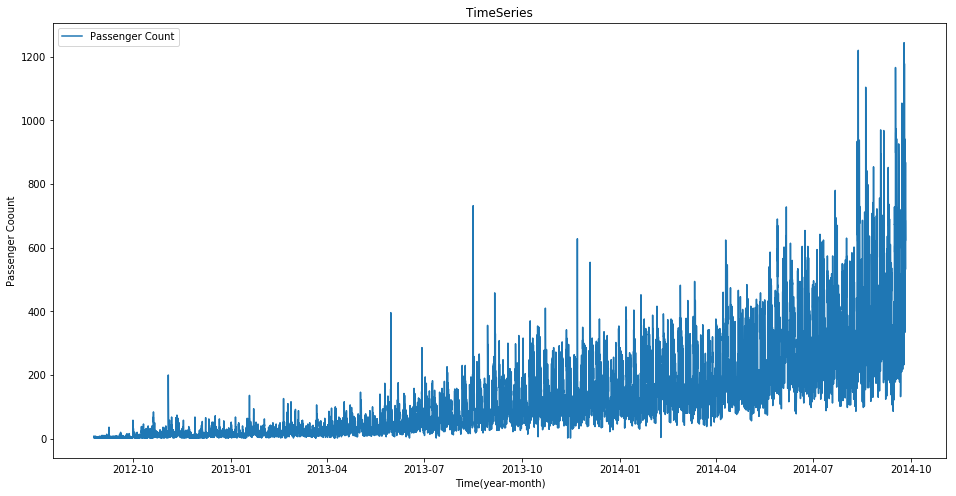

In [18]:
train.index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('TimeSeries')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Coount")
plt.legend(loc='best')

In [19]:
print(df)

                               Datetime  Count  year  month  day  Hour  \
Datetime                                                                 
2012-08-25 00:00:00 2012-08-25 00:00:00      8  2012      8   25     0   
2012-08-25 01:00:00 2012-08-25 01:00:00      2  2012      8   25     1   
2012-08-25 02:00:00 2012-08-25 02:00:00      6  2012      8   25     2   
2012-08-25 03:00:00 2012-08-25 03:00:00      2  2012      8   25     3   
2012-08-25 04:00:00 2012-08-25 04:00:00      2  2012      8   25     4   
2012-08-25 05:00:00 2012-08-25 05:00:00      2  2012      8   25     5   
2012-08-25 06:00:00 2012-08-25 06:00:00      2  2012      8   25     6   
2012-08-25 07:00:00 2012-08-25 07:00:00      2  2012      8   25     7   
2012-08-25 08:00:00 2012-08-25 08:00:00      6  2012      8   25     8   
2012-08-25 09:00:00 2012-08-25 09:00:00      2  2012      8   25     9   
2012-08-25 10:00:00 2012-08-25 10:00:00      2  2012      8   25    10   
2012-08-25 11:00:00 2012-08-25 11:00:0

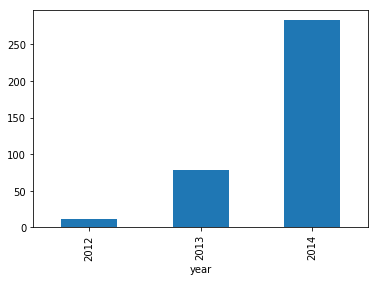

In [20]:
train.groupby('year')['Count'].mean().plot.bar()

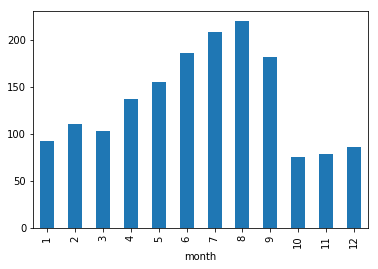

In [21]:
train.groupby('month')['Count'].mean().plot.bar()

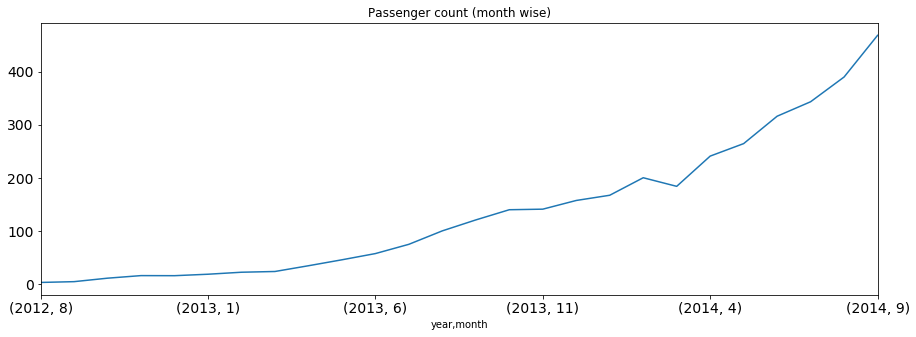

In [22]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger count (month wise)', fontsize=14)

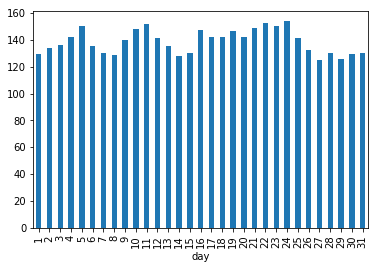

In [23]:
train.groupby('day')['Count'].mean().plot.bar()

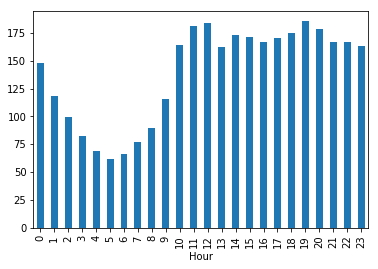

In [24]:
train.groupby('Hour')['Count'].mean().plot.bar()

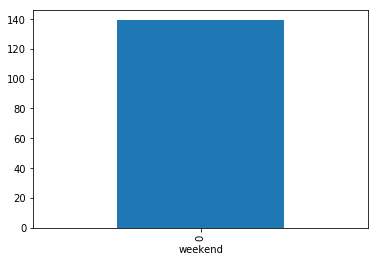

In [25]:
train.groupby('weekend')['Count'].mean().plot.bar()

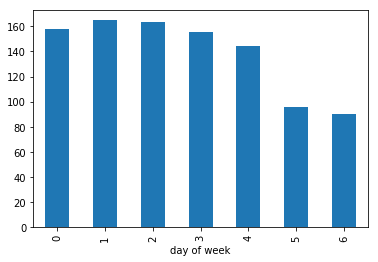

In [26]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [27]:
train = train.drop('ID',1)

In [28]:
train.Timestamp = pd.to_datetime(train.Datetime, format= '%d-%m-%Y %H:%M')
train.index = train.Timestamp

In [29]:
hourly = train.resample('H').mean()

In [30]:
daily = train.resample('D').mean()

In [31]:
weekly = train.resample('W').mean()

In [32]:
monthly = train.resample('M').mean()

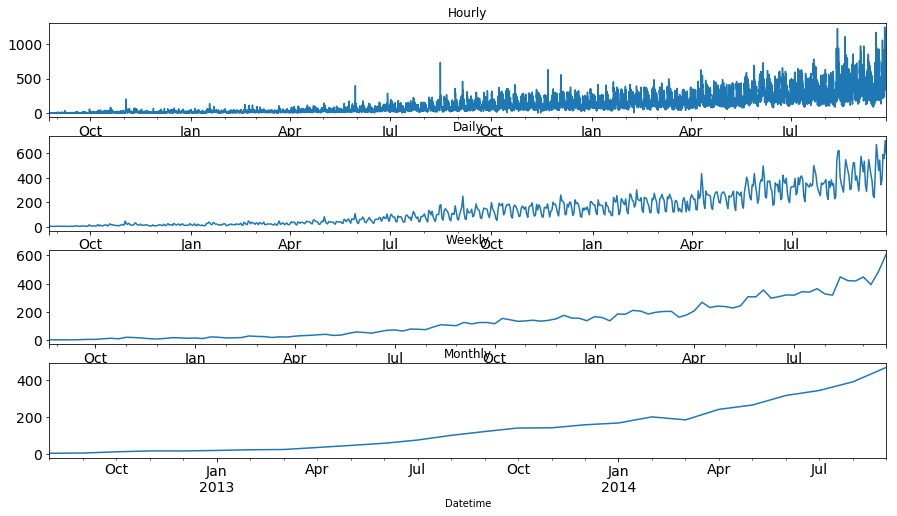

In [33]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [34]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

In [35]:
test = test.resample('D').mean()

In [36]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

In [37]:
train = train.resample('D').mean()

In [38]:
print(train.columns)

Index(['Count', 'year', 'month', 'day', 'Hour', 'day of week', 'weekend'], dtype='object')


In [39]:
test.columns

Index(['ID', 'year', 'month', 'day', 'Hour'], dtype='object')

In [40]:
test

ID    year  month   day  Hour
Datetime                                      
2014-09-26  18299.5  2014.0    9.0  26.0  11.5
2014-09-27  18323.5  2014.0    9.0  27.0  11.5
2014-09-28  18347.5  2014.0    9.0  28.0  11.5
2014-09-29  18371.5  2014.0    9.0  29.0  11.5
2014-09-30  18395.5  2014.0    9.0  30.0  11.5
2014-10-01  18419.5  2014.0   10.0   1.0  11.5
2014-10-02  18443.5  2014.0   10.0   2.0  11.5
2014-10-03  18467.5  2014.0   10.0   3.0  11.5
2014-10-04  18491.5  2014.0   10.0   4.0  11.5
2014-10-05  18515.5  2014.0   10.0   5.0  11.5
2014-10-06  18539.5  2014.0   10.0   6.0  11.5
2014-10-07  18563.5  2014.0   10.0   7.0  11.5
2014-10-08  18587.5  2014.0   10.0   8.0  11.5
2014-10-09  18611.5  2014.0   10.0   9.0  11.5
2014-10-10  18635.5  2014.0   10.0  10.0  11.5
2014-10-11  18659.5  2014.0   10.0  11.0  11.5
2014-10-12  18683.5  2014.0   10.0  12.0  11.5
2014-10-13  18707.5  2014.0   10.0  13.0  11.5
2014-10-14  18731.5  2014.0   10.0  14.0  11.5
2014-10-15  18755.5  2014.0   10.0  15.0  11.5
2014-10-16  18779.5  2014.0   10.0  16.0  11.5
2014-10-17  18803.5  2014.0   10.0  17.0  11.5
2014-10-18  18827.5  2014.0   10.0  18.0  11.5
2014-10-19  18851.5  2014.0   10.0  19.0  11.5
2014-10-20  18875.5  2014.0   10.0  20.0  11.5
2014-10-21  18899.5  2014.0   10.0  21.0  11.5
2014-10-22  18923.5  2014.0   10.0  22.0  11.5
2014-10-23  18947.5  2014.0   10.0  23.0  11.5
2014-10-24  18971.5  2014.0   10.0  24.0  11.5
2014-10-25  18995.5  2014.0   10.0  25.0  11.5
...             ...     ...    ...   ...   ...
2015-03-28  22691.5  2015.0    3.0  28.0  11.5
2015-03-29  22715.5  2015.0    3.0  29.0  11.5
2015-03-30  22739.5  2015.0    3.0  30.0  11.5
2015-03-31  22763.5  2015.0    3.0  31.0  11.5
2015-04-01  22787.5  2015.0    4.0   1.0  11.5
2015-04-02  22811.5  2015.0    4.0   2.0  11.5
2015-04-03  22835.5  2015.0    4.0   3.0  11.5
2015-04-04  22859.5  2015.0    4.0   4.0  11.5
2015-04-05  22883.5  2015.0    4.0   5.0  11.5
2015-04-06  22907.5  2015.0    4.0   6.0  11.5
2015-04-07  22931.5  2015.0    4.0   7.0  11.5
2015-04-08  22955.5  2015.0    4.0   8.0  11.5
2015-04-09  22979.5  2015.0    4.0   9.0  11.5
2015-04-10  23003.5  2015.0    4.0  10.0  11.5
2015-04-11  23027.5  2015.0    4.0  11.0  11.5
2015-04-12  23051.5  2015.0    4.0  12.0  11.5
2015-04-13  23075.5  2015.0    4.0  13.0  11.5
2015-04-14  23099.5  2015.0    4.0  14.0  11.5
2015-04-15  23123.5  2015.0    4.0  15.0  11.5
2015-04-16  23147.5  2015.0    4.0  16.0  11.5
2015-04-17  23171.5  2015.0    4.0  17.0  11.5
2015-04-18  23195.5  2015.0    4.0  18.0  11.5
2015-04-19  23219.5  2015.0    4.0  19.0  11.5
2015-04-20  23243.5  2015.0    4.0  20.0  11.5
2015-04-21  23267.5  2015.0    4.0  21.0  11.5
2015-04-22  23291.5  2015.0    4.0  22.0  11.5
2015-04-23  23315.5  2015.0    4.0  23.0  11.5
2015-04-24  23339.5  2015.0    4.0  24.0  11.5
2015-04-25  23363.5  2015.0    4.0  25.0  11.5
2015-04-26  23387.5  2015.0    4.0  26.0  11.5

[213 rows x 5 columns]

In [41]:
train

Count    year  month   day  Hour  day of week  weekend
Datetime                                                               
2012-08-25    3.166667  2012.0    8.0  25.0  11.5          5.0      0.0
2012-08-26    3.666667  2012.0    8.0  26.0  11.5          6.0      0.0
2012-08-27    2.583333  2012.0    8.0  27.0  11.5          0.0      0.0
2012-08-28    2.416667  2012.0    8.0  28.0  11.5          1.0      0.0
2012-08-29    2.500000  2012.0    8.0  29.0  11.5          2.0      0.0
2012-08-30    3.083333  2012.0    8.0  30.0  11.5          3.0      0.0
2012-08-31    3.250000  2012.0    8.0  31.0  11.5          4.0      0.0
2012-09-01    4.666667  2012.0    9.0   1.0  11.5          5.0      0.0
2012-09-02    4.916667  2012.0    9.0   2.0  11.5          6.0      0.0
2012-09-03    4.500000  2012.0    9.0   3.0  11.5          0.0      0.0
2012-09-04    2.750000  2012.0    9.0   4.0  11.5          1.0      0.0
2012-09-05    4.333333  2012.0    9.0   5.0  11.5          2.0      0.0
2012-09-06    4.166667  2012.0    9.0   6.0  11.5          3.0      0.0
2012-09-07    2.833333  2012.0    9.0   7.0  11.5          4.0      0.0
2012-09-08    4.166667  2012.0    9.0   8.0  11.5          5.0      0.0
2012-09-09    2.833333  2012.0    9.0   9.0  11.5          6.0      0.0
2012-09-10    2.666667  2012.0    9.0  10.0  11.5          0.0      0.0
2012-09-11    2.416667  2012.0    9.0  11.0  11.5          1.0      0.0
2012-09-12    3.500000  2012.0    9.0  12.0  11.5          2.0      0.0
2012-09-13    3.000000  2012.0    9.0  13.0  11.5          3.0      0.0
2012-09-14    3.500000  2012.0    9.0  14.0  11.5          4.0      0.0
2012-09-15    3.833333  2012.0    9.0  15.0  11.5          5.0      0.0
2012-09-16    2.916667  2012.0    9.0  16.0  11.5          6.0      0.0
2012-09-17    3.833333  2012.0    9.0  17.0  11.5          0.0      0.0
2012-09-18    7.833333  2012.0    9.0  18.0  11.5          1.0      0.0
2012-09-19    6.583333  2012.0    9.0  19.0  11.5          2.0      0.0
2012-09-20    3.500000  2012.0    9.0  20.0  11.5          3.0      0.0
2012-09-21    3.750000  2012.0    9.0  21.0  11.5          4.0      0.0
2012-09-22    3.250000  2012.0    9.0  22.0  11.5          5.0      0.0
2012-09-23    4.250000  2012.0    9.0  23.0  11.5          6.0      0.0
...                ...     ...    ...   ...   ...          ...      ...
2014-08-27  520.666667  2014.0    8.0  27.0  11.5          2.0      0.0
2014-08-28  379.250000  2014.0    8.0  28.0  11.5          3.0      0.0
2014-08-29  413.750000  2014.0    8.0  29.0  11.5          4.0      0.0
2014-08-30  352.583333  2014.0    8.0  30.0  11.5          5.0      0.0
2014-08-31  290.166667  2014.0    8.0  31.0  11.5          6.0      0.0
2014-09-01  436.000000  2014.0    9.0   1.0  11.5          0.0      0.0
2014-09-02  573.500000  2014.0    9.0   2.0  11.5          1.0      0.0
2014-09-03  509.000000  2014.0    9.0   3.0  11.5          2.0      0.0
2014-09-04  446.000000  2014.0    9.0   4.0  11.5          3.0      0.0
2014-09-05  532.500000  2014.0    9.0   5.0  11.5          4.0      0.0
2014-09-06  339.833333  2014.0    9.0   6.0  11.5          5.0      0.0
2014-09-07  286.500000  2014.0    9.0   7.0  11.5          6.0      0.0
2014-09-08  426.000000  2014.0    9.0   8.0  11.5          0.0      0.0
2014-09-09  546.000000  2014.0    9.0   9.0  11.5          1.0      0.0
2014-09-10  483.000000  2014.0    9.0  10.0  11.5          2.0      0.0
2014-09-11  424.166667  2014.0    9.0  11.0  11.5          3.0      0.0
2014-09-12  375.416667  2014.0    9.0  12.0  11.5          4.0      0.0
2014-09-13  253.333333  2014.0    9.0  13.0  11.5          5.0      0.0
2014-09-14  238.166667  2014.0    9.0  14.0  11.5          6.0      0.0
2014-09-15  445.333333  2014.0    9.0  15.0  11.5          0.0      0.0
2014-09-16  670.000000  2014.0    9.0  16.0  11.5          1.0      0.0
2014-09-17  569.833333  2014.0    9.0  17.0  11.5          2.0      0.0
2014-09-18  458.333333  2014.0    9.0  18.0  11.5        

In [42]:
Train = train.ix['2012-08-25' : '2014-06-24']
valid = train.ix['2014-06-25' : '2014-09-25']

In [43]:
train

Count    year  month   day  Hour  day of week  weekend
Datetime                                                               
2012-08-25    3.166667  2012.0    8.0  25.0  11.5          5.0      0.0
2012-08-26    3.666667  2012.0    8.0  26.0  11.5          6.0      0.0
2012-08-27    2.583333  2012.0    8.0  27.0  11.5          0.0      0.0
2012-08-28    2.416667  2012.0    8.0  28.0  11.5          1.0      0.0
2012-08-29    2.500000  2012.0    8.0  29.0  11.5          2.0      0.0
2012-08-30    3.083333  2012.0    8.0  30.0  11.5          3.0      0.0
2012-08-31    3.250000  2012.0    8.0  31.0  11.5          4.0      0.0
2012-09-01    4.666667  2012.0    9.0   1.0  11.5          5.0      0.0
2012-09-02    4.916667  2012.0    9.0   2.0  11.5          6.0      0.0
2012-09-03    4.500000  2012.0    9.0   3.0  11.5          0.0      0.0
2012-09-04    2.750000  2012.0    9.0   4.0  11.5          1.0      0.0
2012-09-05    4.333333  2012.0    9.0   5.0  11.5          2.0      0.0
2012-09-06    4.166667  2012.0    9.0   6.0  11.5          3.0      0.0
2012-09-07    2.833333  2012.0    9.0   7.0  11.5          4.0      0.0
2012-09-08    4.166667  2012.0    9.0   8.0  11.5          5.0      0.0
2012-09-09    2.833333  2012.0    9.0   9.0  11.5          6.0      0.0
2012-09-10    2.666667  2012.0    9.0  10.0  11.5          0.0      0.0
2012-09-11    2.416667  2012.0    9.0  11.0  11.5          1.0      0.0
2012-09-12    3.500000  2012.0    9.0  12.0  11.5          2.0      0.0
2012-09-13    3.000000  2012.0    9.0  13.0  11.5          3.0      0.0
2012-09-14    3.500000  2012.0    9.0  14.0  11.5          4.0      0.0
2012-09-15    3.833333  2012.0    9.0  15.0  11.5          5.0      0.0
2012-09-16    2.916667  2012.0    9.0  16.0  11.5          6.0      0.0
2012-09-17    3.833333  2012.0    9.0  17.0  11.5          0.0      0.0
2012-09-18    7.833333  2012.0    9.0  18.0  11.5          1.0      0.0
2012-09-19    6.583333  2012.0    9.0  19.0  11.5          2.0      0.0
2012-09-20    3.500000  2012.0    9.0  20.0  11.5          3.0      0.0
2012-09-21    3.750000  2012.0    9.0  21.0  11.5          4.0      0.0
2012-09-22    3.250000  2012.0    9.0  22.0  11.5          5.0      0.0
2012-09-23    4.250000  2012.0    9.0  23.0  11.5          6.0      0.0
...                ...     ...    ...   ...   ...          ...      ...
2014-08-27  520.666667  2014.0    8.0  27.0  11.5          2.0      0.0
2014-08-28  379.250000  2014.0    8.0  28.0  11.5          3.0      0.0
2014-08-29  413.750000  2014.0    8.0  29.0  11.5          4.0      0.0
2014-08-30  352.583333  2014.0    8.0  30.0  11.5          5.0      0.0
2014-08-31  290.166667  2014.0    8.0  31.0  11.5          6.0      0.0
2014-09-01  436.000000  2014.0    9.0   1.0  11.5          0.0      0.0
2014-09-02  573.500000  2014.0    9.0   2.0  11.5          1.0      0.0
2014-09-03  509.000000  2014.0    9.0   3.0  11.5          2.0      0.0
2014-09-04  446.000000  2014.0    9.0   4.0  11.5          3.0      0.0
2014-09-05  532.500000  2014.0    9.0   5.0  11.5          4.0      0.0
2014-09-06  339.833333  2014.0    9.0   6.0  11.5          5.0      0.0
2014-09-07  286.500000  2014.0    9.0   7.0  11.5          6.0      0.0
2014-09-08  426.000000  2014.0    9.0   8.0  11.5          0.0      0.0
2014-09-09  546.000000  2014.0    9.0   9.0  11.5          1.0      0.0
2014-09-10  483.000000  2014.0    9.0  10.0  11.5          2.0      0.0
2014-09-11  424.166667  2014.0    9.0  11.0  11.5          3.0      0.0
2014-09-12  375.416667  2014.0    9.0  12.0  11.5          4.0      0.0
2014-09-13  253.333333  2014.0    9.0  13.0  11.5          5.0      0.0
2014-09-14  238.166667  2014.0    9.0  14.0  11.5          6.0      0.0
2014-09-15  445.333333  2014.0    9.0  15.0  11.5          0.0      0.0
2014-09-16  670.000000  2014.0    9.0  16.0  11.5          1.0      0.0
2014-09-17  569.833333  2014.0    9.0  17.0  11.5          2.0      0.0
2014-09-18  458.333333  2014.0    9.0  18.0  11.5        

In [44]:
test

ID    year  month   day  Hour
Datetime                                      
2014-09-26  18299.5  2014.0    9.0  26.0  11.5
2014-09-27  18323.5  2014.0    9.0  27.0  11.5
2014-09-28  18347.5  2014.0    9.0  28.0  11.5
2014-09-29  18371.5  2014.0    9.0  29.0  11.5
2014-09-30  18395.5  2014.0    9.0  30.0  11.5
2014-10-01  18419.5  2014.0   10.0   1.0  11.5
2014-10-02  18443.5  2014.0   10.0   2.0  11.5
2014-10-03  18467.5  2014.0   10.0   3.0  11.5
2014-10-04  18491.5  2014.0   10.0   4.0  11.5
2014-10-05  18515.5  2014.0   10.0   5.0  11.5
2014-10-06  18539.5  2014.0   10.0   6.0  11.5
2014-10-07  18563.5  2014.0   10.0   7.0  11.5
2014-10-08  18587.5  2014.0   10.0   8.0  11.5
2014-10-09  18611.5  2014.0   10.0   9.0  11.5
2014-10-10  18635.5  2014.0   10.0  10.0  11.5
2014-10-11  18659.5  2014.0   10.0  11.0  11.5
2014-10-12  18683.5  2014.0   10.0  12.0  11.5
2014-10-13  18707.5  2014.0   10.0  13.0  11.5
2014-10-14  18731.5  2014.0   10.0  14.0  11.5
2014-10-15  18755.5  2014.0   10.0  15.0  11.5
2014-10-16  18779.5  2014.0   10.0  16.0  11.5
2014-10-17  18803.5  2014.0   10.0  17.0  11.5
2014-10-18  18827.5  2014.0   10.0  18.0  11.5
2014-10-19  18851.5  2014.0   10.0  19.0  11.5
2014-10-20  18875.5  2014.0   10.0  20.0  11.5
2014-10-21  18899.5  2014.0   10.0  21.0  11.5
2014-10-22  18923.5  2014.0   10.0  22.0  11.5
2014-10-23  18947.5  2014.0   10.0  23.0  11.5
2014-10-24  18971.5  2014.0   10.0  24.0  11.5
2014-10-25  18995.5  2014.0   10.0  25.0  11.5
...             ...     ...    ...   ...   ...
2015-03-28  22691.5  2015.0    3.0  28.0  11.5
2015-03-29  22715.5  2015.0    3.0  29.0  11.5
2015-03-30  22739.5  2015.0    3.0  30.0  11.5
2015-03-31  22763.5  2015.0    3.0  31.0  11.5
2015-04-01  22787.5  2015.0    4.0   1.0  11.5
2015-04-02  22811.5  2015.0    4.0   2.0  11.5
2015-04-03  22835.5  2015.0    4.0   3.0  11.5
2015-04-04  22859.5  2015.0    4.0   4.0  11.5
2015-04-05  22883.5  2015.0    4.0   5.0  11.5
2015-04-06  22907.5  2015.0    4.0   6.0  11.5
2015-04-07  22931.5  2015.0    4.0   7.0  11.5
2015-04-08  22955.5  2015.0    4.0   8.0  11.5
2015-04-09  22979.5  2015.0    4.0   9.0  11.5
2015-04-10  23003.5  2015.0    4.0  10.0  11.5
2015-04-11  23027.5  2015.0    4.0  11.0  11.5
2015-04-12  23051.5  2015.0    4.0  12.0  11.5
2015-04-13  23075.5  2015.0    4.0  13.0  11.5
2015-04-14  23099.5  2015.0    4.0  14.0  11.5
2015-04-15  23123.5  2015.0    4.0  15.0  11.5
2015-04-16  23147.5  2015.0    4.0  16.0  11.5
2015-04-17  23171.5  2015.0    4.0  17.0  11.5
2015-04-18  23195.5  2015.0    4.0  18.0  11.5
2015-04-19  23219.5  2015.0    4.0  19.0  11.5
2015-04-20  23243.5  2015.0    4.0  20.0  11.5
2015-04-21  23267.5  2015.0    4.0  21.0  11.5
2015-04-22  23291.5  2015.0    4.0  22.0  11.5
2015-04-23  23315.5  2015.0    4.0  23.0  11.5
2015-04-24  23339.5  2015.0    4.0  24.0  11.5
2015-04-25  23363.5  2015.0    4.0  25.0  11.5
2015-04-26  23387.5  2015.0    4.0  26.0  11.5

[213 rows x 5 columns]

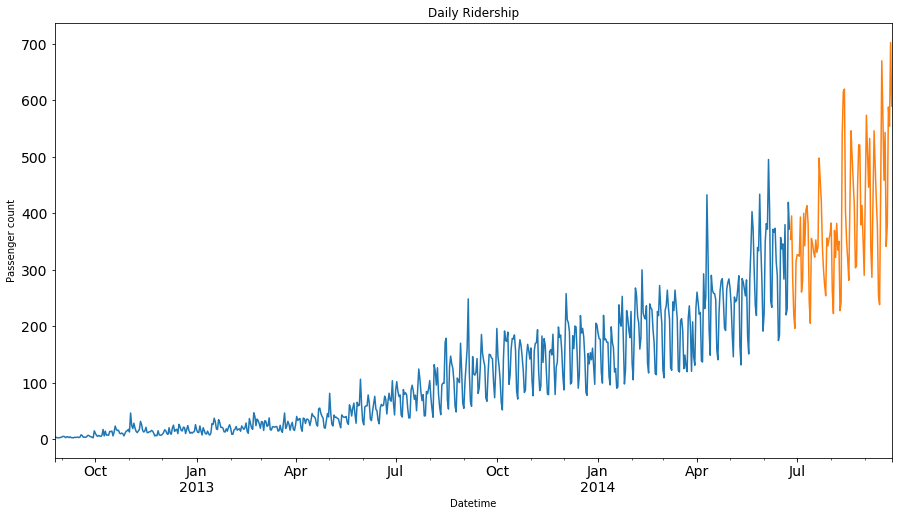

In [45]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
#plt.legend(loc='best')
plt.show()

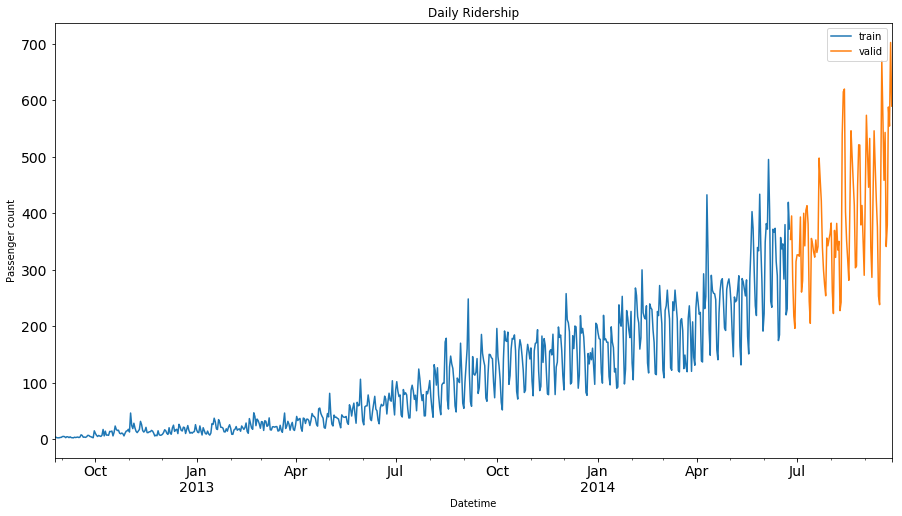

In [46]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

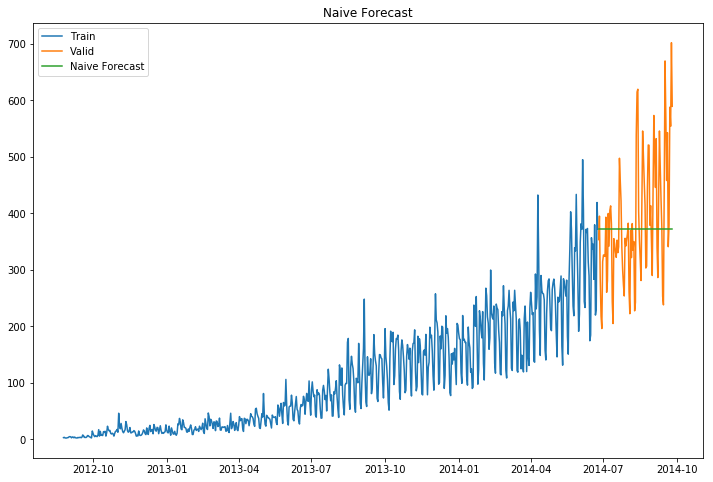

In [47]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [48]:
valid

Count    year  month   day  Hour  day of week  weekend
Datetime                                                               
2014-06-25  353.666667  2014.0    6.0  25.0  11.5          2.0      0.0
2014-06-26  395.250000  2014.0    6.0  26.0  11.5          3.0      0.0
2014-06-27  282.333333  2014.0    6.0  27.0  11.5          4.0      0.0
2014-06-28  218.250000  2014.0    6.0  28.0  11.5          5.0      0.0
2014-06-29  196.250000  2014.0    6.0  29.0  11.5          6.0      0.0
2014-06-30  314.500000  2014.0    6.0  30.0  11.5          0.0      0.0
2014-07-01  326.500000  2014.0    7.0   1.0  11.5          1.0      0.0
2014-07-02  326.083333  2014.0    7.0   2.0  11.5          2.0      0.0
2014-07-03  323.916667  2014.0    7.0   3.0  11.5          3.0      0.0
2014-07-04  393.416667  2014.0    7.0   4.0  11.5          4.0      0.0
2014-07-05  260.416667  2014.0    7.0   5.0  11.5          5.0      0.0
2014-07-06  280.500000  2014.0    7.0   6.0  11.5          6.0      0.0
2014-07-07  400.000000  2014.0    7.0   7.0  11.5          0.0      0.0
2014-07-08  342.250000  2014.0    7.0   8.0  11.5          1.0      0.0
2014-07-09  405.500000  2014.0    7.0   9.0  11.5          2.0      0.0
2014-07-10  413.416667  2014.0    7.0  10.0  11.5          3.0      0.0
2014-07-11  381.166667  2014.0    7.0  11.0  11.5          4.0      0.0
2014-07-12  244.083333  2014.0    7.0  12.0  11.5          5.0      0.0
2014-07-13  205.083333  2014.0    7.0  13.0  11.5          6.0      0.0
2014-07-14  355.416667  2014.0    7.0  14.0  11.5          0.0      0.0
2014-07-15  345.916667  2014.0    7.0  15.0  11.5          1.0      0.0
2014-07-16  331.500000  2014.0    7.0  16.0  11.5          2.0      0.0
2014-07-17  322.250000  2014.0    7.0  17.0  11.5          3.0      0.0
2014-07-18  352.750000  2014.0    7.0  18.0  11.5          4.0      0.0
2014-07-19  330.583333  2014.0    7.0  19.0  11.5          5.0      0.0
2014-07-20  341.000000  2014.0    7.0  20.0  11.5          6.0      0.0
2014-07-21  497.750000  2014.0    7.0  21.0  11.5          0.0      0.0
2014-07-22  458.833333  2014.0    7.0  22.0  11.5          1.0      0.0
2014-07-23  422.083333  2014.0    7.0  23.0  11.5          2.0      0.0
2014-07-24  339.833333  2014.0    7.0  24.0  11.5          3.0      0.0
...                ...     ...    ...   ...   ...          ...      ...
2014-08-27  520.666667  2014.0    8.0  27.0  11.5          2.0      0.0
2014-08-28  379.250000  2014.0    8.0  28.0  11.5          3.0      0.0
2014-08-29  413.750000  2014.0    8.0  29.0  11.5          4.0      0.0
2014-08-30  352.583333  2014.0    8.0  30.0  11.5          5.0      0.0
2014-08-31  290.166667  2014.0    8.0  31.0  11.5          6.0      0.0
2014-09-01  436.000000  2014.0    9.0   1.0  11.5          0.0      0.0
2014-09-02  573.500000  2014.0    9.0   2.0  11.5          1.0      0.0
2014-09-03  509.000000  2014.0    9.0   3.0  11.5          2.0      0.0
2014-09-04  446.000000  2014.0    9.0   4.0  11.5          3.0      0.0
2014-09-05  532.500000  2014.0    9.0   5.0  11.5          4.0      0.0
2014-09-06  339.833333  2014.0    9.0   6.0  11.5          5.0      0.0
2014-09-07  286.500000  2014.0    9.0   7.0  11.5          6.0      0.0
2014-09-08  426.000000  2014.0    9.0   8.0  11.5          0.0      0.0
2014-09-09  546.000000  2014.0    9.0   9.0  11.5          1.0      0.0
2014-09-10  483.000000  2014.0    9.0  10.0  11.5          2.0      0.0
2014-09-11  424.166667  2014.0    9.0  11.0  11.5          3.0      0.0
2014-09-12  375.416667  2014.0    9.0  12.0  11.5          4.0      0.0
2014-09-13  253.333333  2014.0    9.0  13.0  11.5          5.0      0.0
2014-09-14  238.166667  2014.0    9.0  14.0  11.5          6.0      0.0
2014-09-15  445.333333  2014.0    9.0  15.0  11.5          0.0      0.0
2014-09-16  670.000000  2014.0    9.0  16.0  11.5          1.0      0.0
2014-09-17  569.833333  2014.0    9.0  17.0  11.5          2.0      0.0
2014-09-18  458.333333  2014.0    9.0  18.0  11.5        

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


In [50]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]

In [51]:
y_hat_avg['moving_avg_forecast']

Datetime
2014-06-25    313.033333
2014-06-26    313.033333
2014-06-27    313.033333
2014-06-28    313.033333
2014-06-29    313.033333
2014-06-30    313.033333
2014-07-01    313.033333
2014-07-02    313.033333
2014-07-03    313.033333
2014-07-04    313.033333
2014-07-05    313.033333
2014-07-06    313.033333
2014-07-07    313.033333
2014-07-08    313.033333
2014-07-09    313.033333
2014-07-10    313.033333
2014-07-11    313.033333
2014-07-12    313.033333
2014-07-13    313.033333
2014-07-14    313.033333
2014-07-15    313.033333
2014-07-16    313.033333
2014-07-17    313.033333
2014-07-18    313.033333
2014-07-19    313.033333
2014-07-20    313.033333
2014-07-21    313.033333
2014-07-22    313.033333
2014-07-23    313.033333
2014-07-24    313.033333
                 ...    
2014-08-27    313.033333
2014-08-28    313.033333
2014-08-29    313.033333
2014-08-30    313.033333
2014-08-31    313.033333
2014-09-01    313.033333
2014-09-02    313.033333
2014-09-03    313.033333
2014-09-04    31

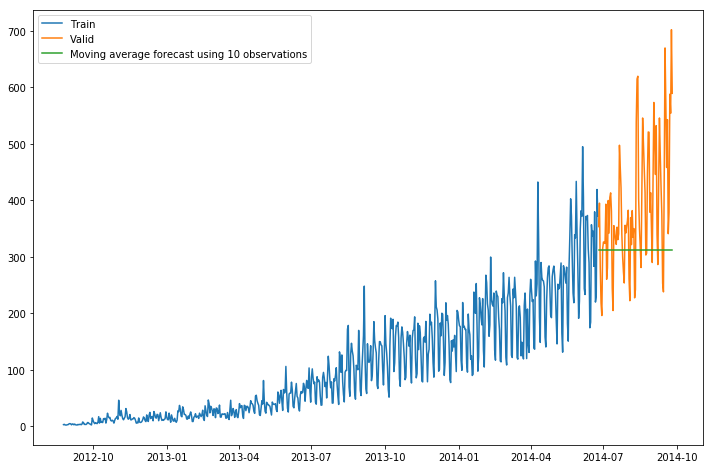

In [52]:
plt.figure(figsize=(12,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving average forecast using 10 observations')
plt.legend(loc='best')
plt.show()

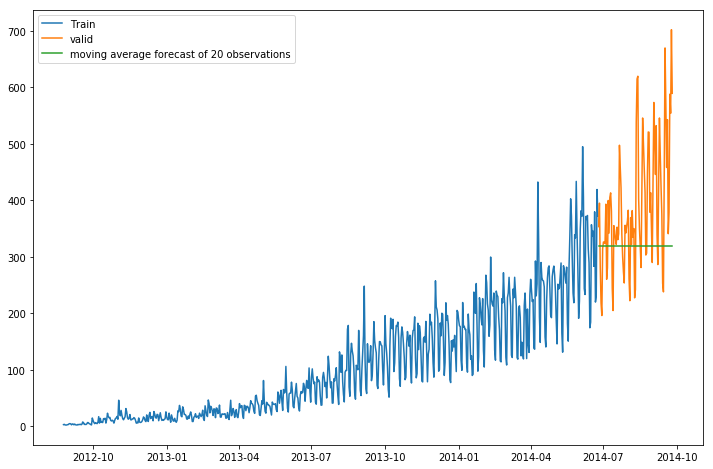

In [53]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(12,8))
plt.plot(Train.Count, label='Train')
plt.plot(valid.Count, label='valid')
plt.plot(y_hat_avg.moving_avg_forecast, label='moving average forecast of 20 observations')
plt.legend(loc='best')
plt.show()

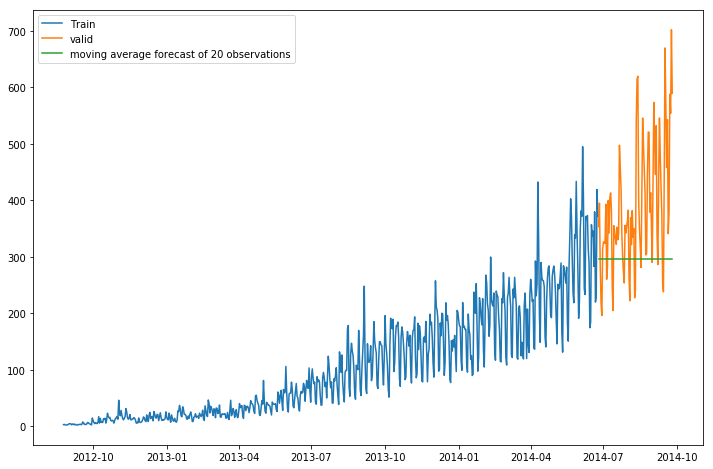

In [54]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(12,8))
plt.plot(Train.Count, label='Train')
plt.plot(valid.Count, label='valid')
plt.plot(y_hat_avg.moving_avg_forecast, label='moving average forecast of 20 observations')
plt.legend(loc='best')
plt.show()

In [55]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


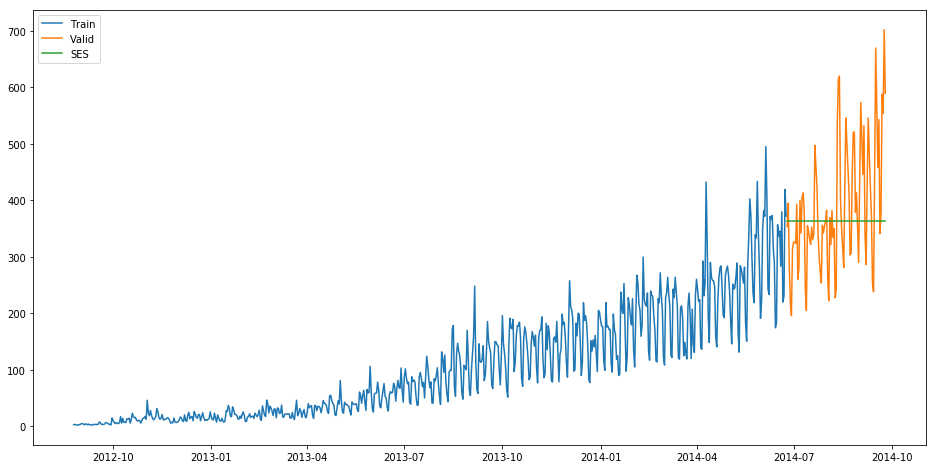

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()


In [57]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


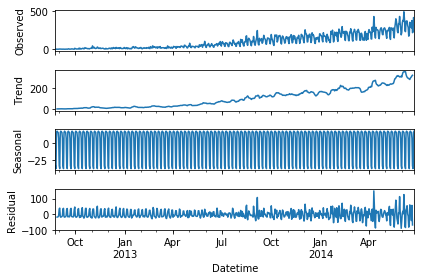

In [58]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

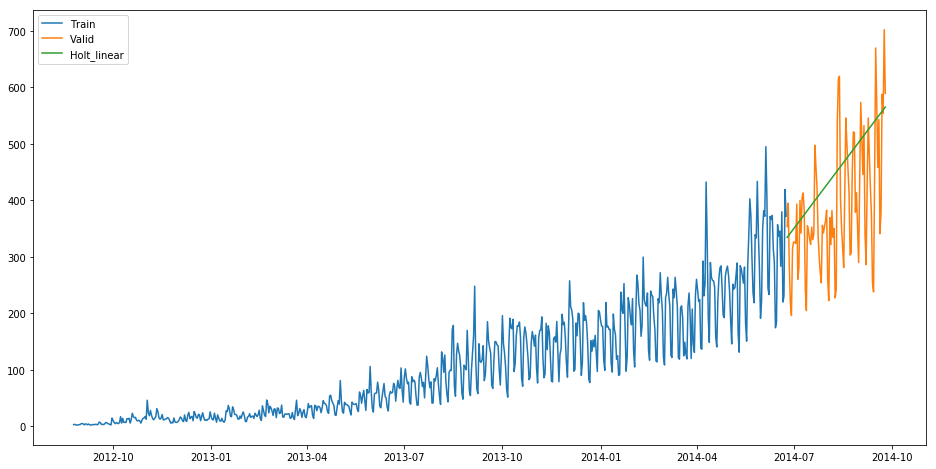

In [59]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train.Count)).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [60]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


In [61]:
submission = pd.read_csv("Submission.csv")

In [62]:
predict = fit1.forecast(len(test))

In [63]:
test['prediction'] = predict

In [64]:
y_hat_avg

Count    year  month   day  Hour  day of week  weekend  \
Datetime                                                                  
2014-06-25  353.666667  2014.0    6.0  25.0  11.5          2.0      0.0   
2014-06-26  395.250000  2014.0    6.0  26.0  11.5          3.0      0.0   
2014-06-27  282.333333  2014.0    6.0  27.0  11.5          4.0      0.0   
2014-06-28  218.250000  2014.0    6.0  28.0  11.5          5.0      0.0   
2014-06-29  196.250000  2014.0    6.0  29.0  11.5          6.0      0.0   
2014-06-30  314.500000  2014.0    6.0  30.0  11.5          0.0      0.0   
2014-07-01  326.500000  2014.0    7.0   1.0  11.5          1.0      0.0   
2014-07-02  326.083333  2014.0    7.0   2.0  11.5          2.0      0.0   
2014-07-03  323.916667  2014.0    7.0   3.0  11.5          3.0      0.0   
2014-07-04  393.416667  2014.0    7.0   4.0  11.5          4.0      0.0   
2014-07-05  260.416667  2014.0    7.0   5.0  11.5          5.0      0.0   
2014-07-06  280.500000  2014.0    7.0   6.0  11.5          6.0      0.0   
2014-07-07  400.000000  2014.0    7.0   7.0  11.5          0.0      0.0   
2014-07-08  342.250000  2014.0    7.0   8.0  11.5          1.0      0.0   
2014-07-09  405.500000  2014.0    7.0   9.0  11.5          2.0      0.0   
2014-07-10  413.416667  2014.0    7.0  10.0  11.5          3.0      0.0   
2014-07-11  381.166667  2014.0    7.0  11.0  11.5          4.0      0.0   
2014-07-12  244.083333  2014.0    7.0  12.0  11.5          5.0      0.0   
2014-07-13  205.083333  2014.0    7.0  13.0  11.5          6.0      0.0   
2014-07-14  355.416667  2014.0    7.0  14.0  11.5          0.0      0.0   
2014-07-15  345.916667  2014.0    7.0  15.0  11.5          1.0      0.0   
2014-07-16  331.500000  2014.0    7.0  16.0  11.5          2.0      0.0   
2014-07-17  322.250000  2014.0    7.0  17.0  11.5          3.0      0.0   
2014-07-18  352.750000  2014.0    7.0  18.0  11.5          4.0      0.0   
2014-07-19  330.583333  2014.0    7.0  19.0  11.5          5.0      0.0   
2014-07-20  341.000000  2014.0    7.0  20.0  11.5          6.0      0.0   
2014-07-21  497.750000  2014.0    7.0  21.0  11.5          0.0      0.0   
2014-07-22  458.833333  2014.0    7.0  22.0  11.5          1.0      0.0   
2014-07-23  422.083333  2014.0    7.0  23.0  11.5          2.0      0.0   
2014-07-24  339.833333  2014.0    7.0  24.0  11.5          3.0      0.0   
...                ...     ...    ...   ...   ...          ...      ...   
2014-08-27  520.666667  2014.0    8.0  27.0  11.5          2.0      0.0   
2014-08-28  379.250000  2014.0    8.0  28.0  11.5          3.0      0.0   
2014-08-29  413.750000  2014.0    8.0  29.0  11.5          4.0      0.0   
2014-08-30  352.583333  2014.0    8.0  30.0  11.5          5.0      0.0   
2014-08-31  290.166667  2014.0    8.0  31.0  11.5          6.0      0.0   
2014-09-01  436.000000  2014.0    9.0   1.0  11.5          0.0      0.0   
2014-09-02  573.500000  2014.0    9.0   2.0  11.5          1.0      0.0   
2014-09-03  509.000000  2014.0    9.0   3.0  11.5          2.0      0.0   
2014-09-04  446.000000  2014.0    9.0   4.0  11.5          3.0      0.0   
2014-09-05  532.500000  2014.0    9.0   5.0  11.5          4.0      0.0   
2014-09-06  339.833333  2014.0    9.0   6.0  11.5          5.0      0.0   
2014-09-07  286.500000  2014.0    9.0   7.0  11.5          6.0      0.0   
2014-09-08  426.000000  2014.0    9.0   8.0  11.5          0.0      0.0   
2014-09-09  546.000000  2014.0    9.0   9.0  11.5          1.0      0.0   
2014-09-10  483.000000  2014.0    9.0  10.0  11.5          2.0      0.0   
2014-09-11  424.166667  2014.0    9.0  11.0  11.5          3.0      0.0   
2014-09-12  375.416667  2014.0    9.0  12.0  11.5          4.0      0.0   
2014-09-13  253.333333  2014.0    9.0  13.0  11.5          5.0      0.0   
2014-09-14  238.166667  2014.0    9.0  14.0  11.5          6.0      0.0   
2014-09-15  445.333333  2014.0    9.0  15.0  11.5          0.0      0.0   
2014-09-16  670.000000  2014.0    9.0  16.

In [65]:
y_hat_avg['Holt_linear']

Datetime
2014-06-25    334.650767
2014-06-26    337.159011
2014-06-27    339.667256
2014-06-28    342.175500
2014-06-29    344.683745
2014-06-30    347.191989
2014-07-01    349.700233
2014-07-02    352.208478
2014-07-03    354.716722
2014-07-04    357.224967
2014-07-05    359.733211
2014-07-06    362.241455
2014-07-07    364.749700
2014-07-08    367.257944
2014-07-09    369.766189
2014-07-10    372.274433
2014-07-11    374.782677
2014-07-12    377.290922
2014-07-13    379.799166
2014-07-14    382.307411
2014-07-15    384.815655
2014-07-16    387.323900
2014-07-17    389.832144
2014-07-18    392.340388
2014-07-19    394.848633
2014-07-20    397.356877
2014-07-21    399.865122
2014-07-22    402.373366
2014-07-23    404.881610
2014-07-24    407.389855
                 ...    
2014-08-27    492.670165
2014-08-28    495.178409
2014-08-29    497.686654
2014-08-30    500.194898
2014-08-31    502.703143
2014-09-01    505.211387
2014-09-02    507.719631
2014-09-03    510.227876
2014-09-04    51

In [66]:
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

In [67]:
train_original

ID            Datetime  Count  year  month  day  Hour         ratio
0          0 2012-08-25 00:00:00      8  2012      8   25     0  3.148037e-06
1          1 2012-08-25 01:00:00      2  2012      8   25     1  7.870093e-07
2          2 2012-08-25 02:00:00      6  2012      8   25     2  2.361028e-06
3          3 2012-08-25 03:00:00      2  2012      8   25     3  7.870093e-07
4          4 2012-08-25 04:00:00      2  2012      8   25     4  7.870093e-07
5          5 2012-08-25 05:00:00      2  2012      8   25     5  7.870093e-07
6          6 2012-08-25 06:00:00      2  2012      8   25     6  7.870093e-07
7          7 2012-08-25 07:00:00      2  2012      8   25     7  7.870093e-07
8          8 2012-08-25 08:00:00      6  2012      8   25     8  2.361028e-06
9          9 2012-08-25 09:00:00      2  2012      8   25     9  7.870093e-07
10        10 2012-08-25 10:00:00      2  2012      8   25    10  7.870093e-07
11        11 2012-08-25 11:00:00      6  2012      8   25    11  2.361028e-06
12        12 2012-08-25 12:00:00      4  2012      8   25    12  1.574019e-06
13        13 2012-08-25 13:00:00      2  2012      8   25    13  7.870093e-07
14        14 2012-08-25 14:00:00      6  2012      8   25    14  2.361028e-06
15        15 2012-08-25 15:00:00      2  2012      8   25    15  7.870093e-07
16        16 2012-08-25 16:00:00      2  2012      8   25    16  7.870093e-07
17        17 2012-08-25 17:00:00      2  2012      8   25    17  7.870093e-07
18        18 2012-08-25 18:00:00      2  2012      8   25    18  7.870093e-07
19        19 2012-08-25 19:00:00      2  2012      8   25    19  7.870093e-07
20        20 2012-08-25 20:00:00      2  2012      8   25    20  7.870093e-07
21        21 2012-08-25 21:00:00      6  2012      8   25    21  2.361028e-06
22        22 2012-08-25 22:00:00      2  2012      8   25    22  7.870093e-07
23        23 2012-08-25 23:00:00      2  2012      8   25    23  7.870093e-07
24        24 2012-08-26 00:00:00      4  2012      8   26     0  1.574019e-06
25        25 2012-08-26 01:00:00      6  2012      8   26     1  2.361028e-06
26        26 2012-08-26 02:00:00      2  2012      8   26     2  7.870093e-07
27        27 2012-08-26 03:00:00      4  2012      8   26     3  1.574019e-06
28        28 2012-08-26 04:00:00      2  2012      8   26     4  7.870093e-07
29        29 2012-08-26 05:00:00      2  2012      8   26     5  7.870093e-07
...      ...                 ...    ...   ...    ...  ...   ...           ...
18258  18258 2014-09-24 18:00:00    966  2014      9   24    18  3.801255e-04
18259  18259 2014-09-24 19:00:00   1178  2014      9   24    19  4.635485e-04
18260  18260 2014-09-24 20:00:00   1008  2014      9   24    20  3.966527e-04
18261  18261 2014-09-24 21:00:00    936  2014      9   24    21  3.683204e-04
18262  18262 2014-09-24 22:00:00    848  2014      9   24    22  3.336919e-04
18263  18263 2014-09-24 23:00:00    942  2014      9   24    23  3.706814e-04
18264  18264 2014-09-25 00:00:00    686  2014      9   25     0  2.699442e-04
18265  18265 2014-09-25 01:00:00    546  2014      9   25     1  2.148535e-04
18266  18266 2014-09-25 02:00:00    550  2014      9   25     2  2.164276e-04
18267  18267 2014-09-25 03:00:00    416  2014      9   25     3  1.636979e-04
18268  18268 2014-09-25 04:00:00    344  2014      9   25     4  1.353656e-04
18269  18269 2014-09-25 05:00:00    334  2014      9   25     5  1.314306e-04
18270  18270 2014-09-25 06:00:00    416  2014      9   25     6  1.636979e-04
18271  18271 2014-09-25 07:00:00    498  2014      9   25     7  1.959653e-04
18272  18272 2014-09-25 08:00:00    482  2014      9   25     8  1.896692e-04
18273  18273 2014-09-25 09:00:00    512  2014      9   25     9  2.014744e-04
18274  18274 2014-09-25 10:00:00    724  2014      9   25    10  2.848974e-04
18275  18275 2014-09-25 11:00:00    656  2014      9   25    11  2.581391e-04
18276  18276 2014-09-25 12:00:00    672  2014      9   25    12  2.644351e-04
18277  18277 2014-09-25 13:00:00

In [68]:
temp = train_original.groupby(['Hour'])['ratio'].sum()

In [69]:
temp

Hour
0     0.044287
1     0.035343
2     0.029911
3     0.024714
4     0.020802
5     0.018621
6     0.020023
7     0.023221
8     0.026741
9     0.034555
10    0.049047
11    0.054375
12    0.054951
13    0.048600
14    0.051965
15    0.051309
16    0.049999
17    0.051164
18    0.052423
19    0.055627
20    0.053455
21    0.049895
22    0.050076
23    0.048892
Name: ratio, dtype: float64

In [70]:
pd.DataFrame(temp, columns=['Hour', 'ratio']).to_csv('GROUPby.csv')

In [71]:
temp2 = pd.read_csv("GROUPby.csv")
temp2 = temp2.drop('Hour.1', 1)

In [72]:
temp2

Hour     ratio
0      0  0.044287
1      1  0.035343
2      2  0.029911
3      3  0.024714
4      4  0.020802
5      5  0.018621
6      6  0.020023
7      7  0.023221
8      8  0.026741
9      9  0.034555
10    10  0.049047
11    11  0.054375
12    12  0.054951
13    13  0.048600
14    14  0.051965
15    15  0.051309
16    16  0.049999
17    17  0.051164
18    18  0.052423
19    19  0.055627
20    20  0.053455
21    21  0.049895
22    22  0.050076
23    23  0.048892

In [73]:
merge = pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')

In [74]:
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)


In [75]:
merge

ID_x   day  prediction   ID_y  Hour
0     18299.5  26.0  334.650767  18288     0
1     18299.5  26.0  334.650767  18289     1
2     18299.5  26.0  334.650767  18290     2
3     18299.5  26.0  334.650767  18291     3
4     18299.5  26.0  334.650767  18292     4
5     18299.5  26.0  334.650767  18293     5
6     18299.5  26.0  334.650767  18294     6
7     18299.5  26.0  334.650767  18295     7
8     18299.5  26.0  334.650767  18296     8
9     18299.5  26.0  334.650767  18297     9
10    18299.5  26.0  334.650767  18298    10
11    18299.5  26.0  334.650767  18299    11
12    18299.5  26.0  334.650767  18300    12
13    18299.5  26.0  334.650767  18301    13
14    18299.5  26.0  334.650767  18302    14
15    18299.5  26.0  334.650767  18303    15
16    18299.5  26.0  334.650767  18304    16
17    18299.5  26.0  334.650767  18305    17
18    18299.5  26.0  334.650767  18306    18
19    18299.5  26.0  334.650767  18307    19
20    18299.5  26.0  334.650767  18308    20
21    18299.5  26.0  334.650767  18309    21
22    18299.5  26.0  334.650767  18310    22
23    18299.5  26.0  334.650767  18311    23
24    18323.5  27.0  337.159011  18312     0
25    18323.5  27.0  337.159011  18313     1
26    18323.5  27.0  337.159011  18314     2
27    18323.5  27.0  337.159011  18315     3
28    18323.5  27.0  337.159011  18316     4
29    18323.5  27.0  337.159011  18317     5
...       ...   ...         ...    ...   ...
5082  23363.5  25.0  863.890338  23370    18
5083  23363.5  25.0  863.890338  23371    19
5084  23363.5  25.0  863.890338  23372    20
5085  23363.5  25.0  863.890338  23373    21
5086  23363.5  25.0  863.890338  23374    22
5087  23363.5  25.0  863.890338  23375    23
5088  23387.5  26.0  866.398583  23376     0
5089  23387.5  26.0  866.398583  23377     1
5090  23387.5  26.0  866.398583  23378     2
5091  23387.5  26.0  866.398583  23379     3
5092  23387.5  26.0  866.398583  23380     4
5093  23387.5  26.0  866.398583  23381     5
5094  23387.5  26.0  866.398583  23382     6
5095  23387.5  26.0  866.398583  23383     7
5096  23387.5  26.0  866.398583  23384     8
5097  23387.5  26.0  866.398583  23385     9
5098  23387.5  26.0  866.398583  23386    10
5099  23387.5  26.0  866.398583  23387    11
5100  23387.5  26.0  866.398583  23388    12
5101  23387.5  26.0  866.398583  23389    13
5102  23387.5  26.0  866.398583  23390    14
5103  23387.5  26.0  866.398583  23391    15
5104  23387.5  26.0  866.398583  23392    16
5105  23387.5  26.0  866.398583  23393    17
5106  23387.5  26.0  866.398583  23394    18
5107  23387.5  26.0  866.398583  23395    19
5108  23387.5  26.0  866.398583  23396    20
5109  23387.5  26.0  866.398583  23397    21
5110  23387.5  26.0  866.398583  23398    22
5111  23387.5  26.0  866.398583  23399    23

[5112 rows x 5 columns]

In [76]:
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

In [77]:
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']

In [78]:
prediction

ID_x   day  prediction   ID_y  Hour     ratio        Count     ID
0     18299.5  26.0  334.650767  18288     0  0.044287   355.692974  18288
1     18299.5  26.0  334.650767  18289     1  0.035343   283.861602  18289
2     18299.5  26.0  334.650767  18290     2  0.029911   240.234347  18290
3     18299.5  26.0  334.650767  18291     3  0.024714   198.497058  18291
4     18299.5  26.0  334.650767  18292     4  0.020802   167.075574  18292
5     18299.5  26.0  334.650767  18293     5  0.018621   149.560198  18293
6     18299.5  26.0  334.650767  18294     6  0.020023   160.817825  18294
7     18299.5  26.0  334.650767  18295     7  0.023221   186.506200  18295
8     18299.5  26.0  334.650767  18296     8  0.026741   214.773526  18296
9     18299.5  26.0  334.650767  18297     9  0.034555   277.534323  18297
10    18299.5  26.0  334.650767  18298    10  0.049047   393.928452  18298
11    18299.5  26.0  334.650767  18299    11  0.054375   436.721341  18299
12    18299.5  26.0  334.650767  18300    12  0.054951   441.348282  18300
13    18299.5  26.0  334.650767  18301    13  0.048600   390.338147  18301
14    18299.5  26.0  334.650767  18302    14  0.051965   417.366566  18302
15    18299.5  26.0  334.650767  18303    15  0.051309   412.094886  18303
16    18299.5  26.0  334.650767  18304    16  0.049999   401.576812  18304
17    18299.5  26.0  334.650767  18305    17  0.051164   410.931830  18305
18    18299.5  26.0  334.650767  18306    18  0.052423   421.045364  18306
19    18299.5  26.0  334.650767  18307    19  0.055627   446.771665  18307
20    18299.5  26.0  334.650767  18308    20  0.053455   429.332140  18308
21    18299.5  26.0  334.650767  18309    21  0.049895   400.736124  18309
22    18299.5  26.0  334.650767  18310    22  0.050076   402.189945  18310
23    18299.5  26.0  334.650767  18311    23  0.048892   392.683223  18311
24    18323.5  27.0  337.159011  18312     0  0.044287   358.358932  18312
25    18323.5  27.0  337.159011  18313     1  0.035343   285.989176  18313
26    18323.5  27.0  337.159011  18314     2  0.029911   242.034930  18314
27    18323.5  27.0  337.159011  18315     3  0.024714   199.984816  18315
28    18323.5  27.0  337.159011  18316     4  0.020802   168.327824  18316
29    18323.5  27.0  337.159011  18317     5  0.018621   150.681168  18317
...       ...   ...         ...    ...   ...       ...          ...    ...
5082  23363.5  25.0  863.890338  23370    18  0.052423  1086.915249  23370
5083  23363.5  25.0  863.890338  23371    19  0.055627  1153.326879  23371
5084  23363.5  25.0  863.890338  23372    20  0.053455  1108.307300  23372
5085  23363.5  25.0  863.890338  23373    21  0.049895  1034.487592  23373
5086  23363.5  25.0  863.890338  23374    22  0.050076  1038.240583  23374
5087  23363.5  25.0  863.890338  23375    23  0.048892  1013.699283  23375
5088  23387.5  26.0  866.398583  23376     0  0.044287   920.876087  23376
5089  23387.5  26.0  866.398583  23377     1  0.035343   734.907295  23377
5090  23387.5  26.0  866.398583  23378     2  0.029911   621.957929  23378
5091  23387.5  26.0  866.398583  23379     3  0.024714   513.901616  23379
5092  23387.5  26.0  866.398583  23380     4  0.020802   432.552544  23380
5093  23387.5  26.0  866.398583  23381     5  0.018621   387.205877  23381
5094  23387.5  26.0  866.398583  23382     6  0.020023   416.351461  23382
5095  23387.5  26.0  866.398583  23383     7  0.023221   482.857724  23383
5096  23387.5  26.0  866.398583  23384     8  0.026741   556.040796  23384
5097  23387.5  26.0  866.398583  23385     9  0.034555   718.526200  23385
5098  23387.5  26.0  866.398583  23386    10  0.049047  1019.866339  23386
5099  23387.5  26.0  866.398583  23387    11  0.054375  1130.655561  23387
5100  23387.5  26.0  866.398583  23388    12  0.054951  1142.634543  23388
5101  23387.5  26.0  866.398583  23389    13  0.048600  1010.571172  23389
5102  23387.5  26.0  866.398583  23390    14  0.051965  1080.546758  23390
5103  23387.5  26.0  866.398583  2

In [79]:
submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis=1)
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_Linear.csv')

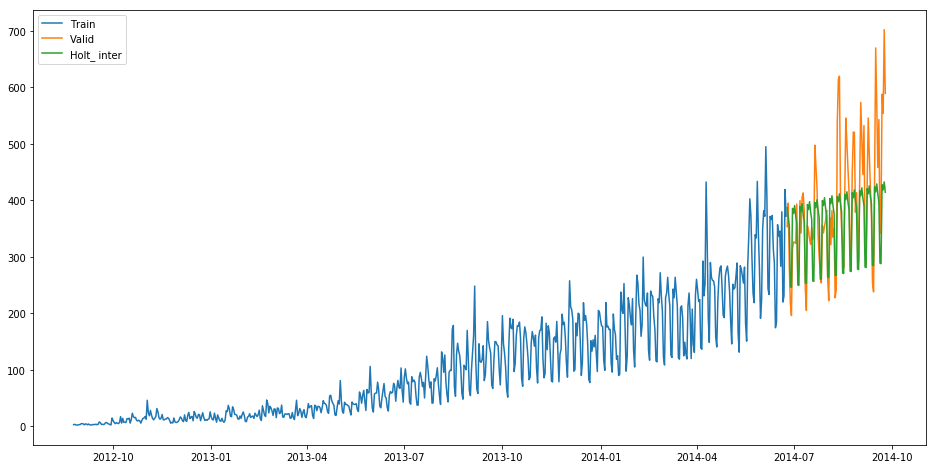

In [80]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_ inter')
plt.legend(loc='best')
plt.show()

In [81]:
rms= sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37467736825413


In [82]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [83]:
merge = pd.merge(test, test_original, on=('day','month','year'),how='left')
merge['Hour'] = merge['Hour_y']

In [84]:
merge=merge.drop(['year','month','Datetime','Hour_x','Hour_y'],axis=1)

In [85]:
prediction = pd.merge(merge, temp2, on='Hour', how='left')

In [86]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

In [87]:
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['day', 'Hour','ratio','prediction','ID_x','ID_y'],axis=1)

In [88]:
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

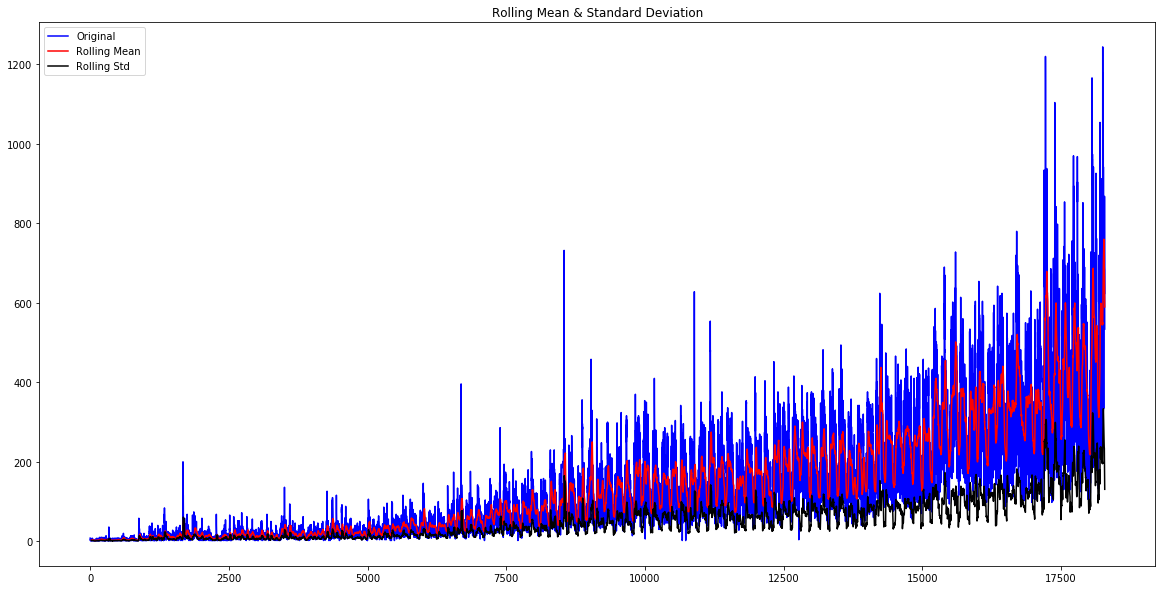

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [89]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
        #Determing rolling statistics
    df = pd.DataFrame(timeseries)  
    rolmean =df.rolling(window=24).mean() # 24 hours on each day
    rolstd = df.rolling(24).std()
         #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
            #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

In [94]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = pd.rolling_mean(Train_log, 24)

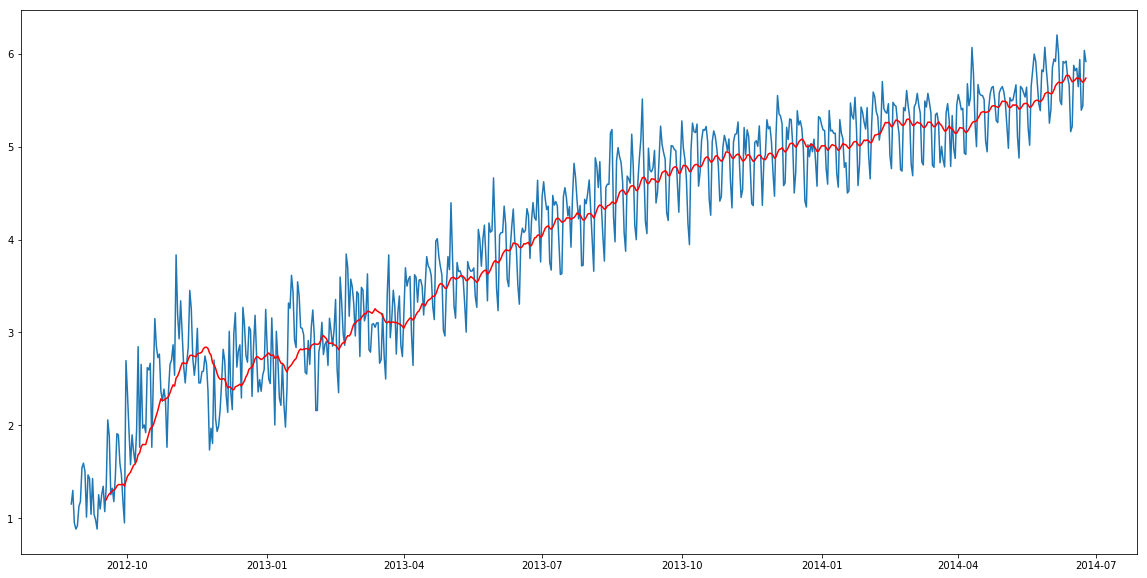

In [95]:
df1 = pd.DataFrame(Train_log)
moving_avg = df1.rolling(window=24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color='red')
plt.show()

In [96]:
train_log_moving_avg_diff = Train_log - moving_avg

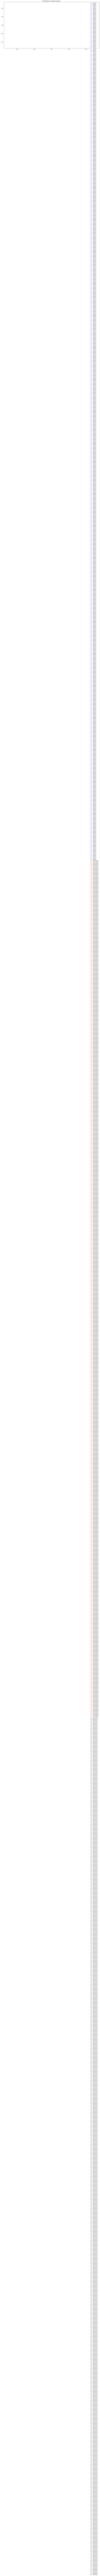

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [98]:
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

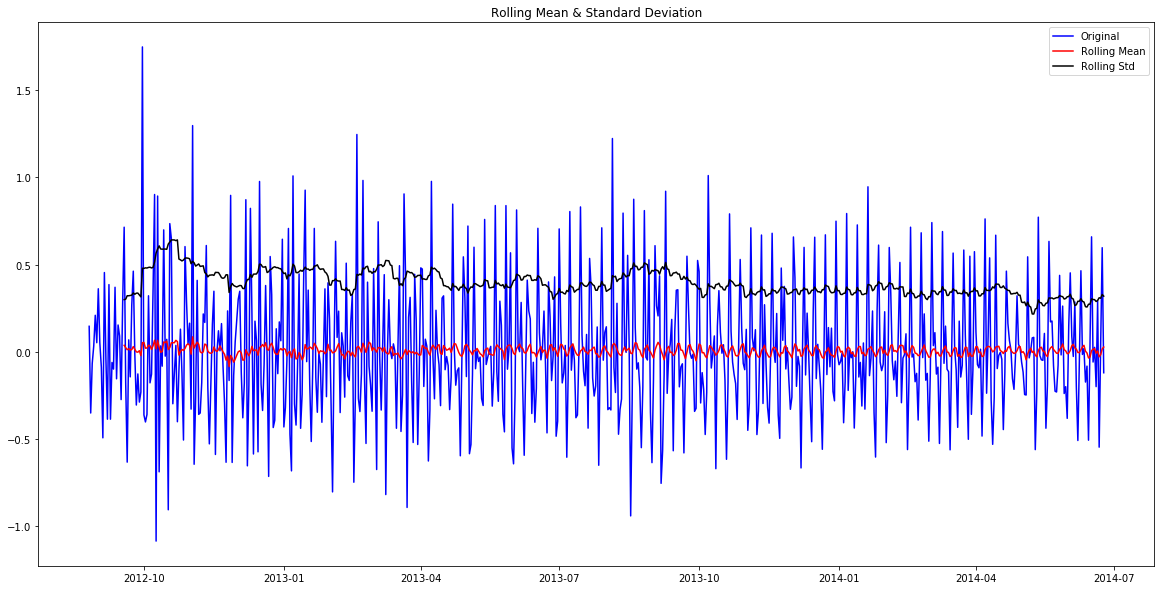

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [100]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

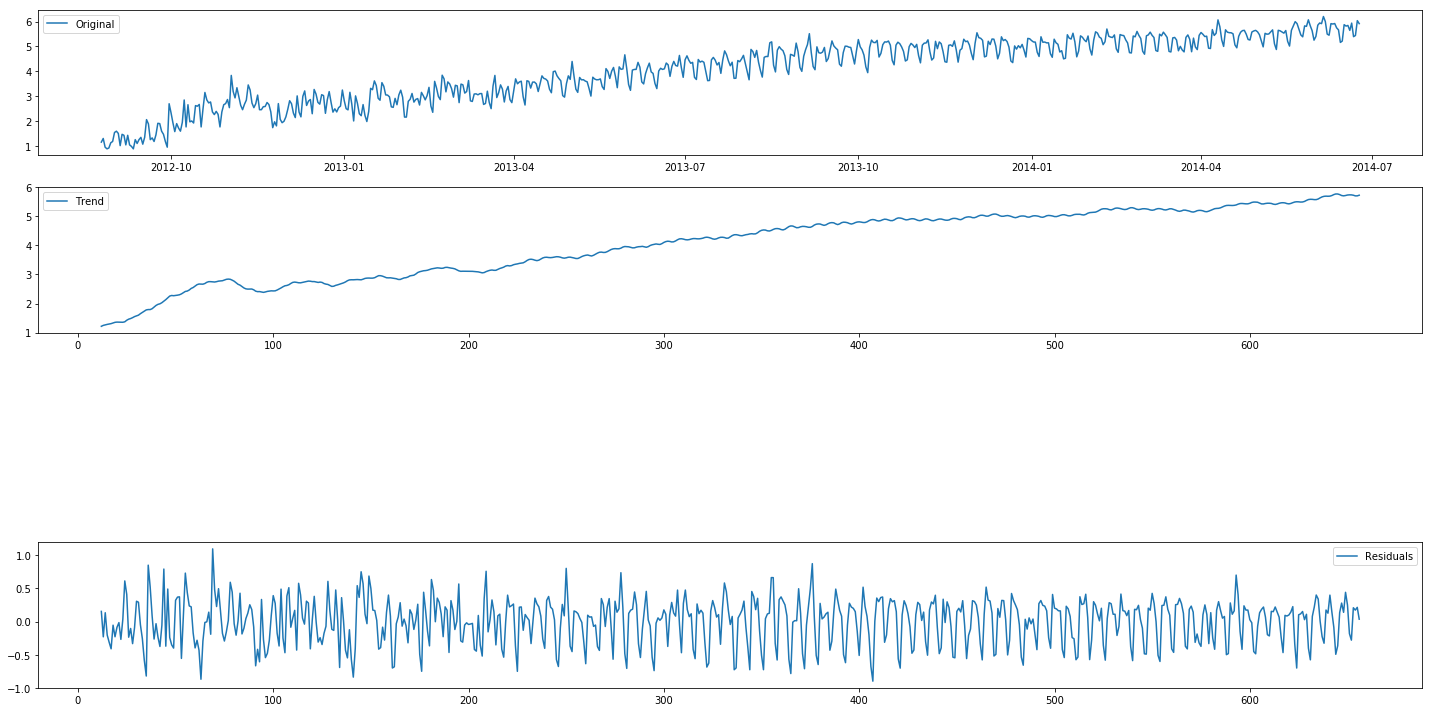

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()